<a href="https://colab.research.google.com/github/hopebrooke/hb-final-project/blob/main/DeePorePractice/DeePorePractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# load google drive content
from google.colab import drive
drive.mount('/content/drive')


# view files in DeePore folder
%cd /content/drive/MyDrive/hb-final-project/DeePore
!ls

import DeePore as dp
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/hb-final-project/DeePore
Data	    Demo1.py  Demo3.py	Demo5.py  minmax.npy   results.txt    VarNames.txt
DeePore.py  Demo2.py  Demo4.py	images	  __pycache__  sample_gt.txt


In [8]:
# dp.show_feature_maps doesn't work on this due to floats/int conversion
# redefining here with same code but added casting

def show_feature_maps(A):
    N= int(np.ceil(np.sqrt(A.shape[0])))
    f=plt.figure(figsize=(N*10,N*10))
    for I in range(A.shape[0]):
        plt.subplot(N,N,I+1)
        plt.imshow(dp.normal(np.squeeze(A[I,:,:,:])))
        plt.axis('off')
    plt.show()

    f.savefig('images/initial_feature_maps.png')


# using monkey patching to update orginal function (not advised!)
dp.show_feature_maps = show_feature_maps

In [ ]:
# dp.trainmodel doesn't create Log directory initially
# creating Log directory here to prevent errors
log_dir = '/DeePore/Logs'
os.makedirs(log_dir, exist_ok=True)

In [9]:
# CODE COPIED AND ALTERED FROM DEEPORE DEMO 1

model=dp.loadmodel()
# 2. read and transform your data into initial feature maps
# in this example, the data is a 400 x 400 x 400 binary MATLAB mat file in which 0 indicates void and 1 indicates solid space
A=dp.feedsampledata(FileName="/Data/Sample_large.mat")
# 3. show feature maps (optional)
dp.show_feature_maps(A)
# 4. predict properties
all_preds=dp.predict(model,A,res=4.8) # res is the spatial resolution of image in micron/pixel
# 5. save results into a text file and also print it in console
dp.prettyresult(all_preds,'results.txt')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'Model3.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

File "/content/drive/MyDrive/Project/DeePore/DeePore_Compact_Data.h5" is detected on your machine.
Cheching the data for outliers. Please wait...
checking sample0
checking sample100
checking sample200
checking sample300
checking sample400
checking sample500
checking sample600
checking sample700
checking sample800
checking sample900
checking sample1000
checking sample1100
checking sample1200
checking sample1300
checking sample1400
checking sample1500
checking sample1600
checking sample1700
checking sample1800
checking sample1900
checking sample2000
checking sample2100
checking sample2200
checking sample2300
checking sample2400
checking sample2500
checking sample2600
checking sample2700
checking sample2800
checking sample2900
checking sample3000
checking sample3100
checking sample3200
checking sample3300
checking sample3400
checking sample3500
checking sample3600
checking sample3700
checking sample3800
checking sample3900
checking sample4000
checking sample4100
checking sample4200
checki

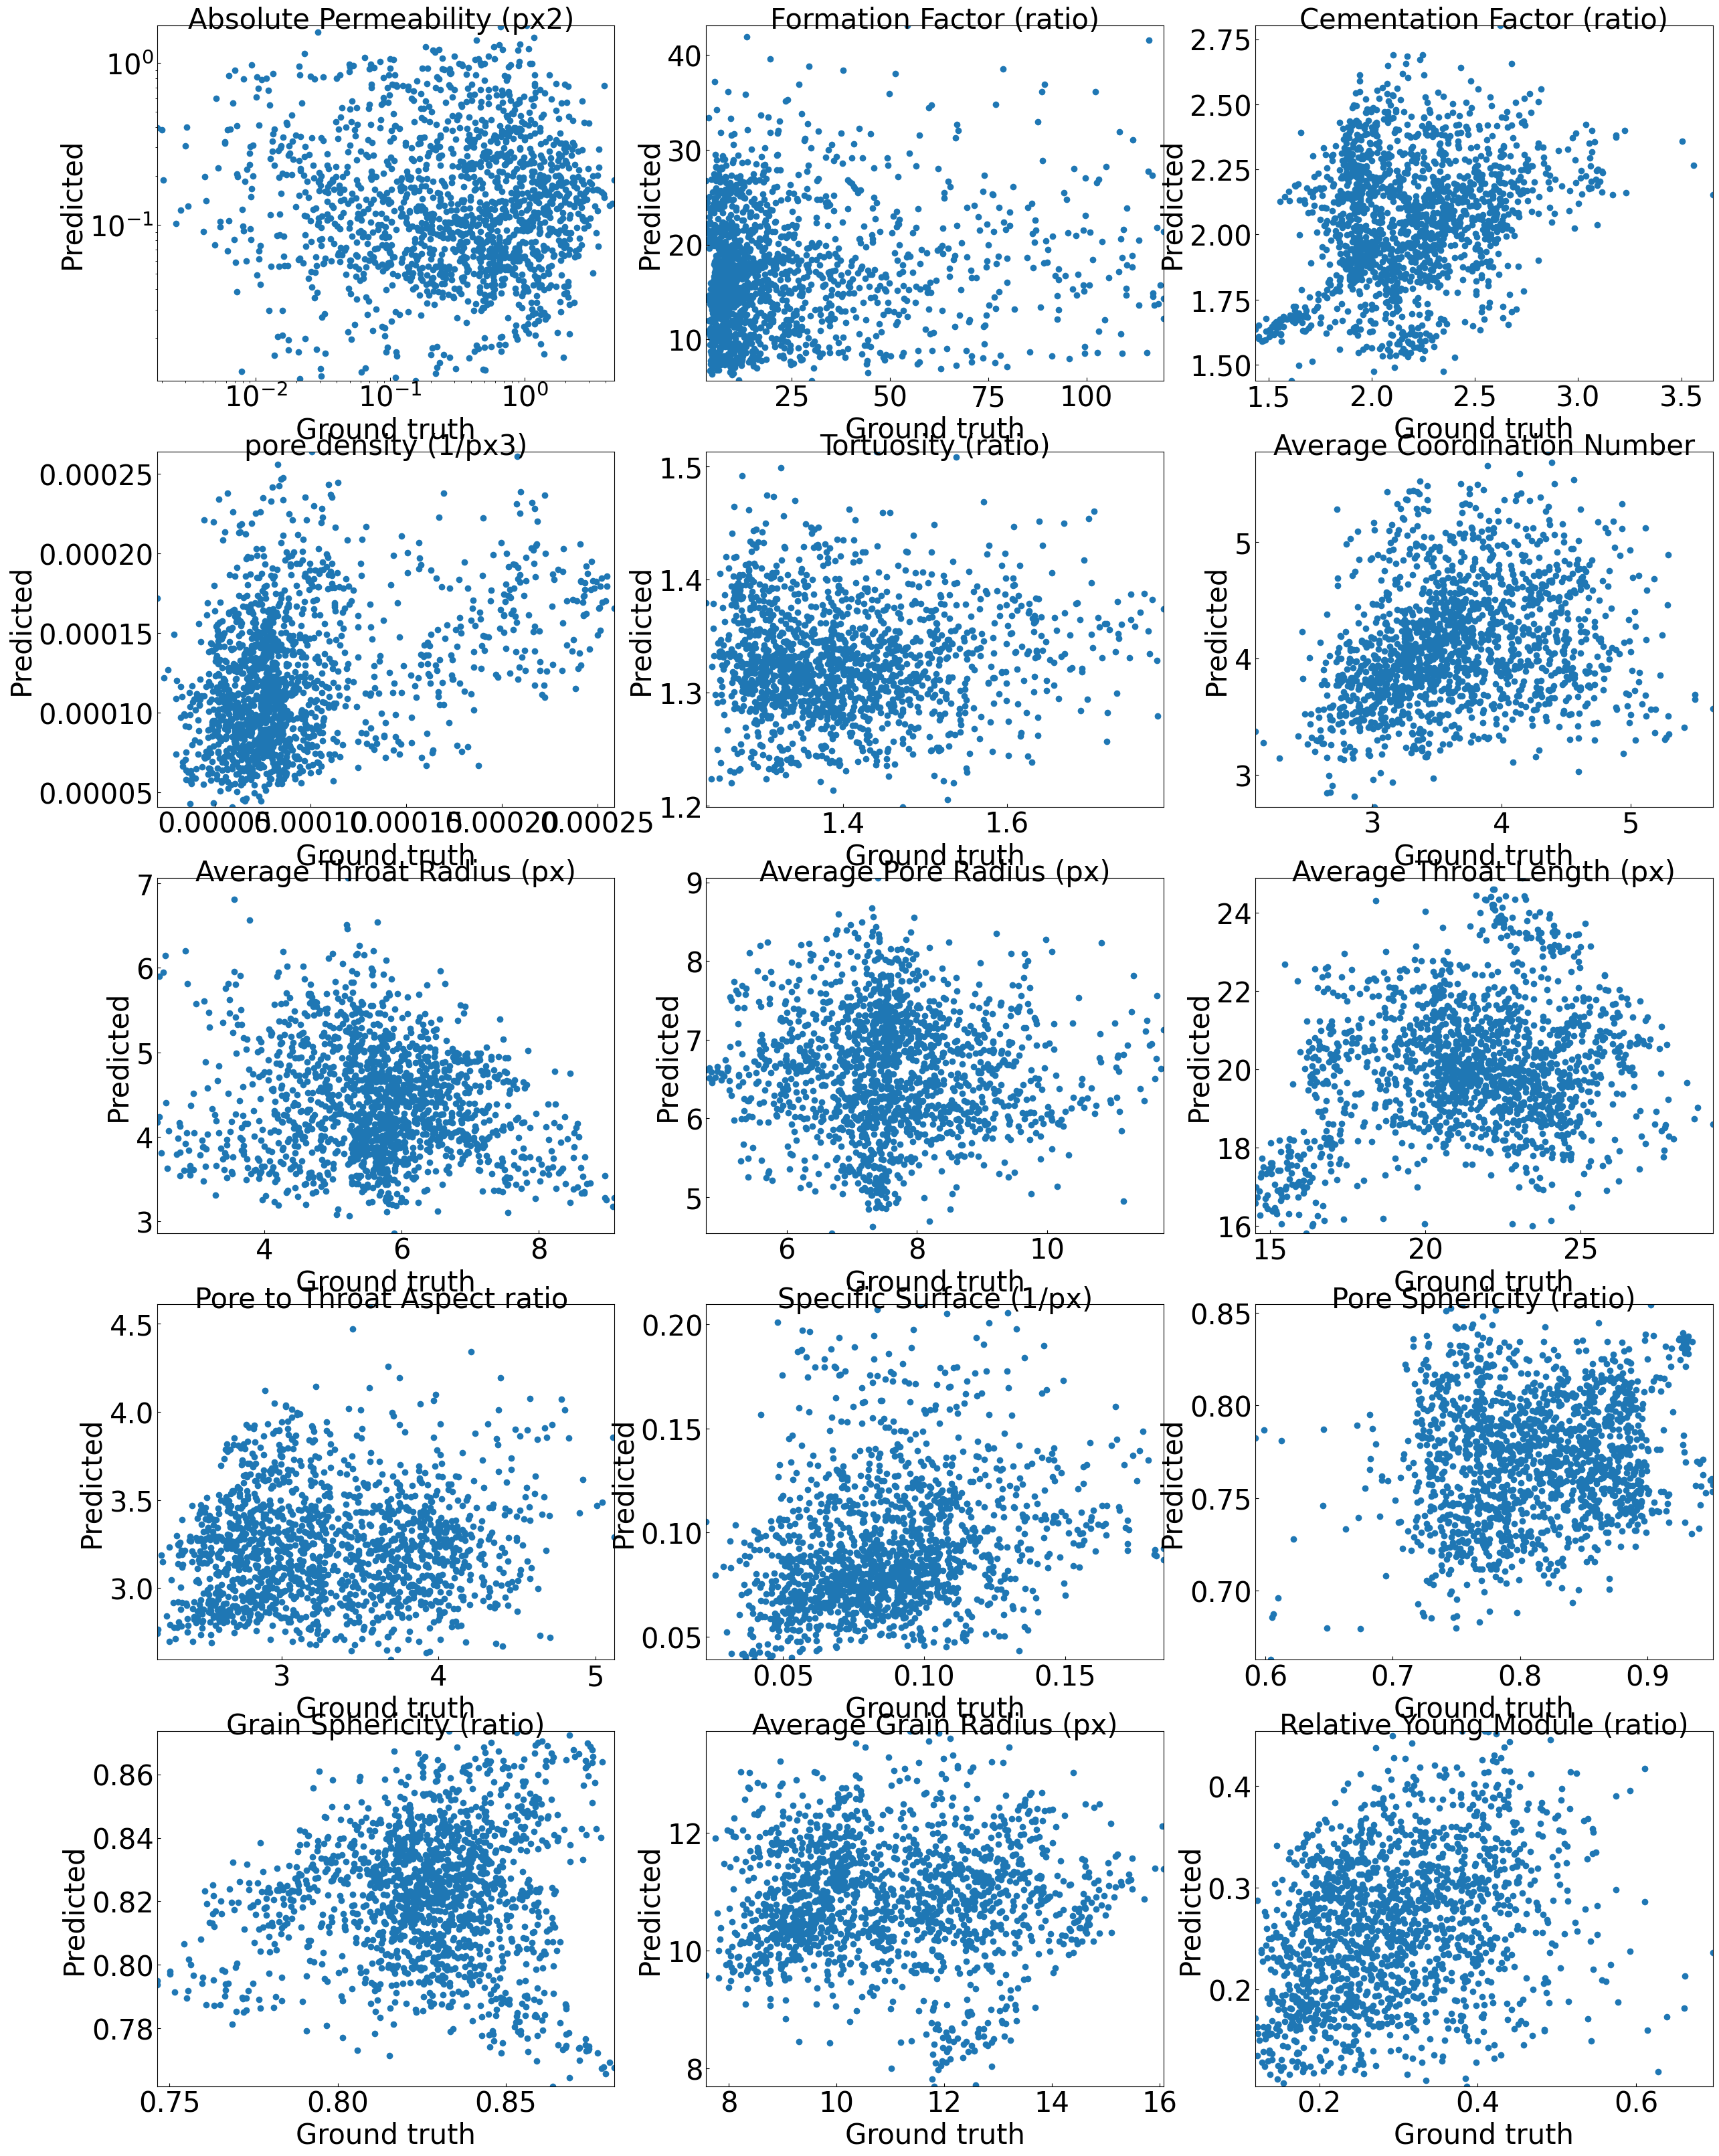

In [ ]:
# CODE COPIED AND ALTERED FROM DEEPORE DEMO 2

# Retrain and test the model:
# If you want to try you own architecture of neural network or retrain the present one
# 1. check or download the compact data
Data_compact='/content/drive/MyDrive/Project/DeePore/DeePore_Compact_Data.h5'
dp.check_get('https://zenodo.org/record/4297035/files/DeePore_Compact_Data.h5?download=1',Data_compact)

# 2. prepare the dataset by removing outliers and creating list of training, evaluation and test samples
List=dp.prep(Data_compact)
TrainList, EvalList, TestList = dp.splitdata(List)
# 3. retrain the model
model=dp.trainmodel(Data_compact,TrainList,EvalList,retrain=1,epochs=20,batch_size=100,ModelType=3)
# 4. test the model
dp.testmodel(model,Data_compact,TestList)

File "/content/drive/MyDrive/Project/DeePore/DeePore_Dataset.h5" is detected on your machine.


DeePore output results including 15 single-value

paramters, 4 functions and 11 distributions

__________________________________________________

        ### Single-value parameters ###

__________________________________________________



Properties                              Value

--------------------------------------------------

Absolute Permeability (px2)             0.0321214

Formation Factor (ratio)                16.9433861

Cementation Factor (ratio)              1.9621598

pore density (1/px3)                    0.0002908

Tortuosity (ratio)                      1.2430909

Average Coordination Number             4.742775

Average Throat Radius (px)              2.673661

Average Pore Radius (px)                5.13837

Average Throat Length (px)              15.4859619

Pore to Throat Aspect ratio             3.565485

Specific Surface (1/px)                 0.1543706

Pore 

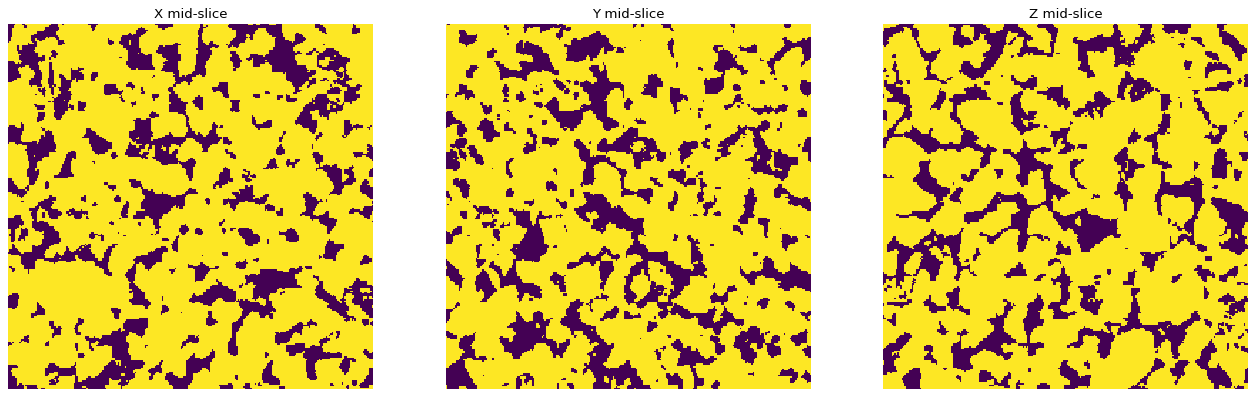

In [ ]:
# CODE COPIED AND ALTERED FROM DEEPORE DEMO 3

# Explore the dataset:
# If you want to open images of dataset and visualize them
# 1. check or download the complete dataset
Data_complete='/content/drive/MyDrive/Project/DeePore/DeePore_Dataset.h5'
dp.check_get('https://zenodo.org/record/4297035/files/DeePore_Dataset.h5?download=1',Data_complete)

# 2. read the first image out of 17700
A=dp.readh5slice(Data_complete,'X',[0])
# 3. show mid-slices of the loaded image
dp.showentry(A)
# 4. show and save the properties of this image which assumed to be the ground truth as text file
props=dp.readh5slice(Data_complete,'Y',[0])
dp.prettyresult(props,'sample_gt.txt',units='px')

In [ ]:
# CODE COPIED AND ALTERED FROM DEEPORE DEMO 4

# Comparing different model architectures:
# 1. check or download the compact data
Data_compact='/content/drive/MyDrive/Project/DeePore/DeePore_Compact_Data.h5'
dp.check_get('https://zenodo.org/record/4297035/files/DeePore_Compact_Data.h5?download=1',Data_compact)
# 2. prepare the dataset by removing outliers and creating list of training, evaluation and test samples
List=dp.prep(Data_compact)

# 3. shuffling the dataset
List=dp.shuf(List)

List=List[1:1000]     #uncomment for a smaller dataset for test purposes
TrainList, EvalList, TestList = dp.splitdata(List)

# 4. defining the training and testing workflows
def calc(I):
    model=dp.trainmodel(Data_compact,TrainList,EvalList,retrain=1,epochs=20,batch_size=100,ModelType=I)
    dp.testmodel(model,Data_compact,TestList,ModelType=I)

# 5. test different scenarios in parallel
import numpy as np
out=dp.parfor(calc,np.arange(1,10))

File "/content/drive/MyDrive/Project/DeePore/DeePore_Compact_Data.h5" is detected on your machine.
Cheching the data for outliers. Please wait...
checking sample0
checking sample100
checking sample200
checking sample300
checking sample400
checking sample500
checking sample600
checking sample700
checking sample800
checking sample900
checking sample1000
checking sample1100
checking sample1200
checking sample1300
checking sample1400
checking sample1500
checking sample1600
checking sample1700
checking sample1800
checking sample1900
checking sample2000
checking sample2100
checking sample2200
checking sample2300
checking sample2400
checking sample2500
checking sample2600
checking sample2700
checking sample2800
checking sample2900
checking sample3000
checking sample3100
checking sample3200
checking sample3300
checking sample3400
checking sample3500
checking sample3600
checking sample3700
checking sample3800
checking sample3900
checking sample4000
checking sample4100
checking sample4200
checki

 67%|██████▋   | 6/9 [40:43<23:35, 471.70s/it]/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|██████████| 9/9 [1:00:29<00:00, 403.26s/it]


In [ ]:
# CODE COPIED AMD ADJUSTED FROM DEEPORE DEMO 5

# Comparing statistics of the training, validation and testing data:
# 1. check or download the compact data
Data_compact='/content/drive/MyDrive/Project/DeePore/DeePore_Compact_Data.h5'
dp.check_get('https://zenodo.org/record/4297035/files/DeePore_Compact_Data.h5?download=1',Data_compact)
# 2. prepare the dataset by removing outliers and creating list of training, validation and test samples
List=dp.prep(Data_compact)
TrainList, EvalList, TestList = dp.splitdata(List)

# 3. read datasets 'Y' into arrays
Data_Eval=dp.readh5slice(Data_compact,'Y',EvalList)
Data_Train=dp.readh5slice(Data_compact,'Y',TrainList)
Data_Test=dp.readh5slice(Data_compact,'Y',TestList)

# exporting to MATLAB for extra postprocessing if you needed
# import scipy.io as sio
# sio.savemat('All_Data.mat',{'train':Data_Train,'eval':Data_Eval,'test':Data_Test})

# 4. plot histograms
import matplotlib.pyplot as plt
FN=5 # feature id number, you can select 0 to 14
h=plt.hist(Data_Eval[:,FN,0],50,histtype='step',density=True,label='validation')
h=plt.hist(Data_Train[:,FN,0],50,histtype='step',density=True,label='training')
h=plt.hist(Data_Test[:,FN,0],50,histtype='step',density=True,label='testing')
plt.ylabel('Frequency')
plt.xlabel('Property #' +str(FN))
plt.legend(loc='upper left')

File "/content/drive/MyDrive/Project/DeePore/DeePore_Compact_Data.h5" is detected on your machine.
Cheching the data for outliers. Please wait...
checking sample0
checking sample100
checking sample200
checking sample300
checking sample400
checking sample500
checking sample600
checking sample700
checking sample800
checking sample900
checking sample1000
checking sample1100
checking sample1200
checking sample1300
checking sample1400
checking sample1500
checking sample1600
checking sample1700
checking sample1800
checking sample1900
checking sample2000
checking sample2100
checking sample2200
checking sample2300
checking sample2400
checking sample2500
checking sample2600
checking sample2700
checking sample2800
checking sample2900
checking sample3000
checking sample3100
checking sample3200
checking sample3300
checking sample3400
checking sample3500
checking sample3600
checking sample3700
checking sample3800
checking sample3900
checking sample4000
checking sample4100
checking sample4200
checki

TypeError: Indexing arrays must have integer dtypes